In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

uncleaned_sales_df = pd.read_csv('uncleaned_sales_data.csv')
cleaned_sales_df = pd.read_csv('Sales.csv')


In [2]:
before_cleaning_df = uncleaned_sales_df.copy()

In [3]:

uncleaned_sales_df['Customer_Age'].fillna(uncleaned_sales_df['Customer_Age'].median(), inplace=True)



C:\Users\bhavy\AppData\Local\Temp\ipykernel_3140\3074038647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uncleaned_sales_df['Customer_Age'].fillna(uncleaned_sales_df['Customer_Age'].median(), inplace=True)


In [4]:

uncleaned_sales_df['Customer_Gender'].fillna(uncleaned_sales_df['Customer_Gender'].mode()[0], inplace=True)


C:\Users\bhavy\AppData\Local\Temp\ipykernel_3140\3263837411.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uncleaned_sales_df['Customer_Gender'].fillna(uncleaned_sales_df['Customer_Gender'].mode()[0], inplace=True)


In [5]:

uncleaned_sales_df['Country'] = uncleaned_sales_df['Country'].str.title()
uncleaned_sales_df['State'] = uncleaned_sales_df['State'].str.title()


In [6]:

uncleaned_sales_df['Product_Category'] = uncleaned_sales_df['Product_Category'].str.title()
uncleaned_sales_df['Sub_Category'] = uncleaned_sales_df['Sub_Category'].str.title()


In [7]:

uncleaned_sales_df['Date'] = pd.to_datetime(uncleaned_sales_df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')


In [8]:


numerical_columns = ['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
uncleaned_sales_df[numerical_columns] = uncleaned_sales_df[numerical_columns].apply(pd.to_numeric, errors='coerce')


In [9]:

#  remaining missing values
missing_values = uncleaned_sales_df.isnull().sum()


In [10]:

uncleaned_sales_df.to_csv('Sales.csv', index=False)

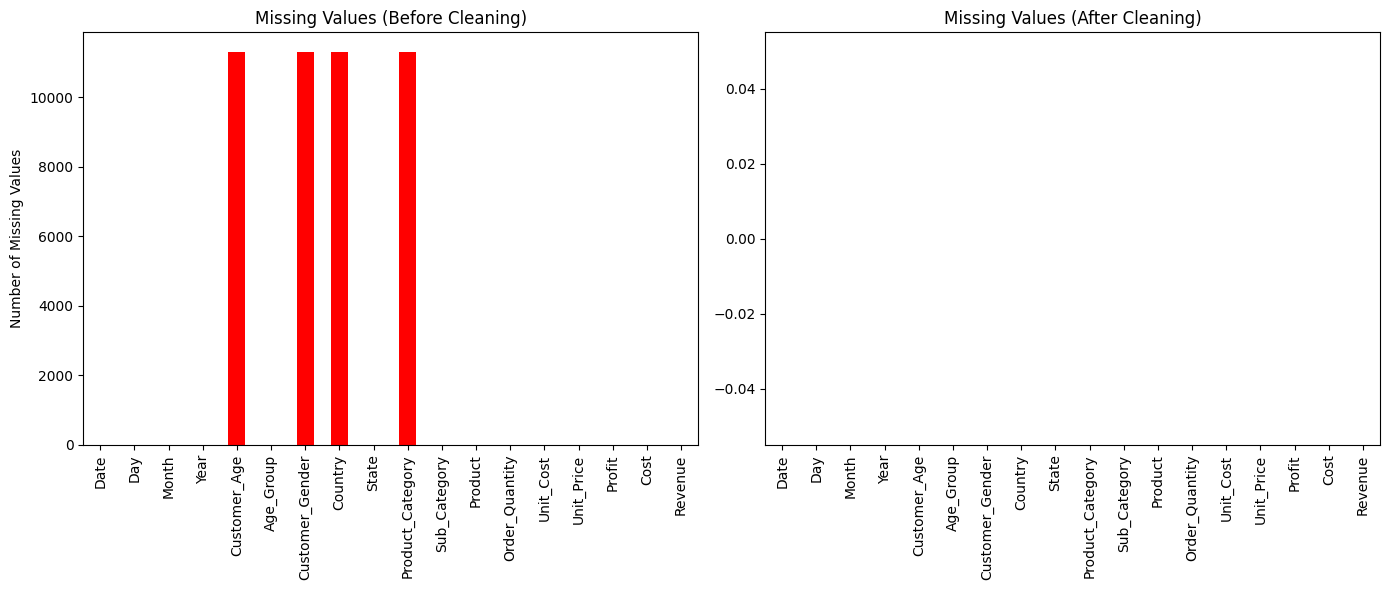

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before cleaning
before_missing = before_cleaning_df.isnull().sum()
before_missing.plot(kind='bar', ax=ax[0], color='red')
ax[0].set_title('Missing Values (Before Cleaning)')
ax[0].set_ylabel('Number of Missing Values')

# After cleaning
after_missing = cleaned_sales_df.isnull().sum()
after_missing.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Missing Values (After Cleaning)')

plt.tight_layout()
plt.show()

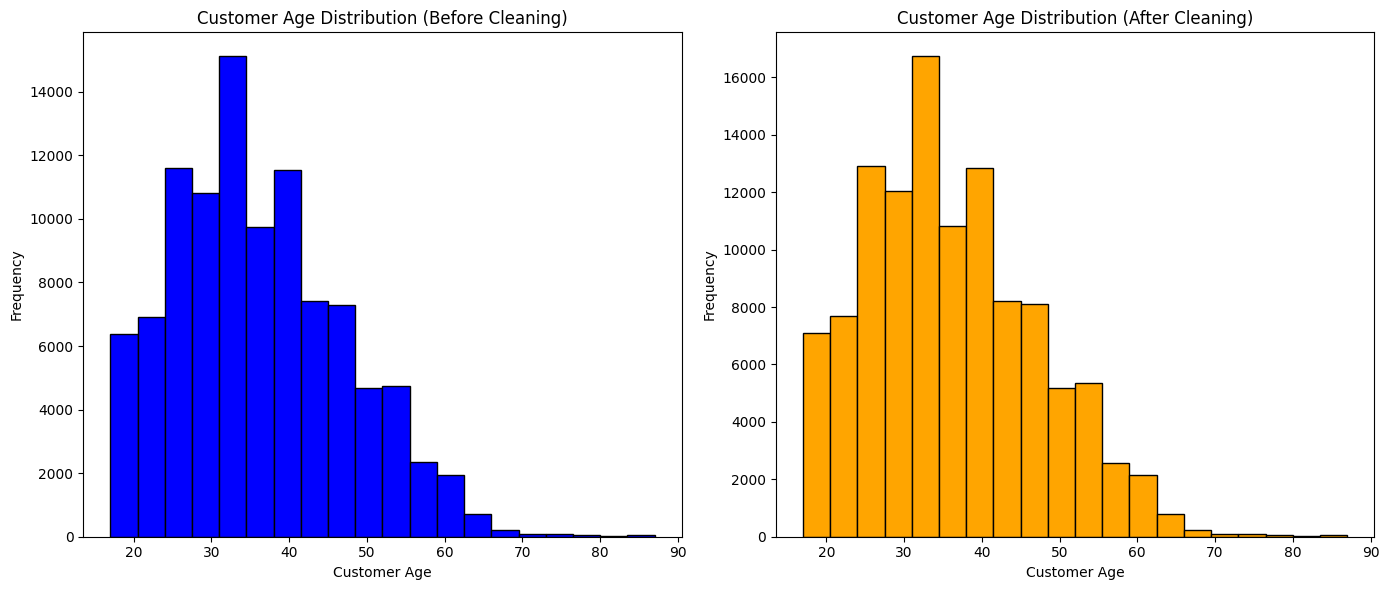

In [17]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before cleaning
before_cleaning_df['Customer_Age'].plot(kind='hist', bins=20, ax=ax[0], color='blue', edgecolor='black')
ax[0].set_title('Customer Age Distribution (Before Cleaning)')
ax[0].set_xlabel('Customer Age')

# After cleaning
cleaned_sales_df['Customer_Age'].plot(kind='hist', bins=20, ax=ax[1], color='orange', edgecolor='black')
ax[1].set_title('Customer Age Distribution (After Cleaning)')
ax[1].set_xlabel('Customer Age')

plt.tight_layout()
plt.show()


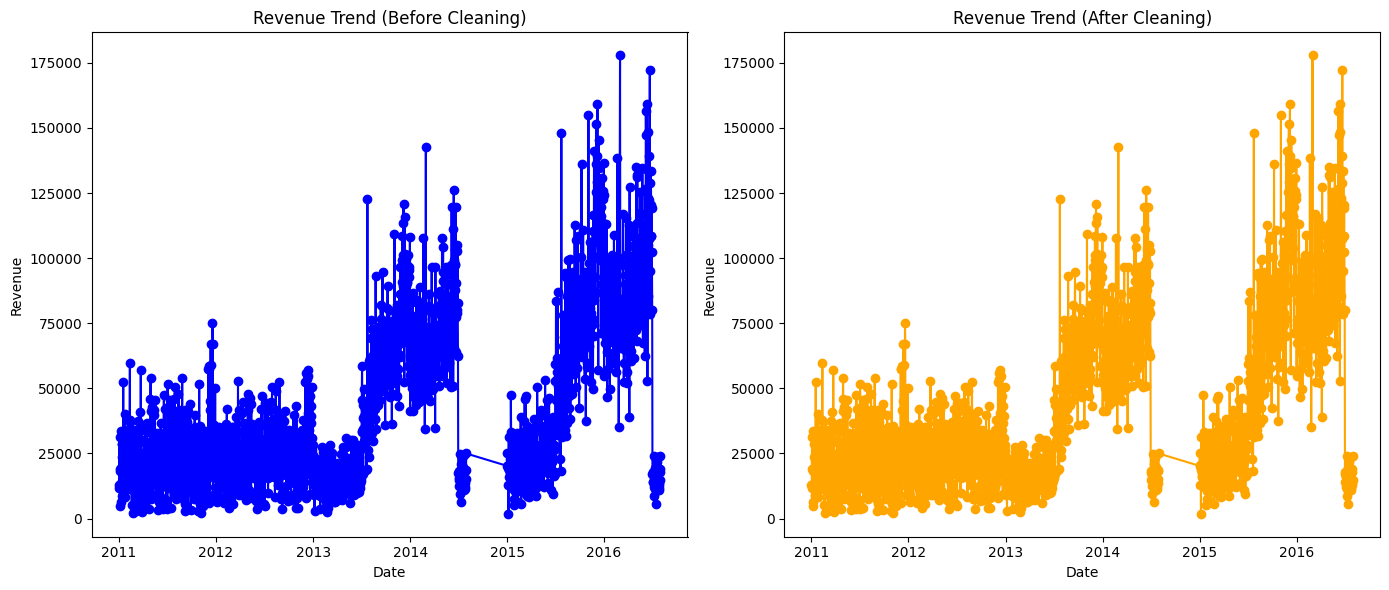

In [24]:

# Convert the 'Date' columns to datetime format
before_cleaning_df['Date'] = pd.to_datetime(before_cleaning_df['Date'], errors='coerce')
cleaned_sales_df['Date'] = pd.to_datetime(cleaned_sales_df['Date'], errors='coerce')

# Group by 'Date' and aggregate Revenue to see the trend over time
before_trend = before_cleaning_df.groupby('Date')['Revenue'].sum().reset_index()
after_trend = cleaned_sales_df.groupby('Date')['Revenue'].sum().reset_index()

# Create subplots to show before and after cleaning revenue trends
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot before cleaning trend
ax[0].plot(before_trend['Date'], before_trend['Revenue'], color='blue', marker='o')
ax[0].set_title('Revenue Trend (Before Cleaning)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Revenue')

# Plot after cleaning trend
ax[1].plot(after_trend['Date'], after_trend['Revenue'], color='orange', marker='o')
ax[1].set_title('Revenue Trend (After Cleaning)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Revenue')

# Adjust layout and save the plot
plt.tight_layout()

# Save the figure to a file
plt.savefig('revenue_trends_before_after_cleaning.png', dpi=300)

# Display the plot
plt.show()
